In [ ]:
!pip install igdb-api-v4

In [ ]:
!pip install praw

     |████████████████████████████████| 176 kB 16.7 MB/s 
     |████████████████████████████████| 54 kB 1.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from igdb.wrapper import IGDBWrapper
wrapper = IGDBWrapper("", "")

ModuleNotFoundError: ignored

In [ ]:
'''With a wrapper instance already created'''

# Protobuf API request
from igdb.igdbapi_pb2 import GameResult
# JSON API request
byte_array = wrapper.api_request('games','fields id, name; offset 0; where platforms=48;')
# parse into JSON however you like...
games_message = GameResult()
games_message.ParseFromString(byte_array) # Fills the protobuf message object with the response

HTTPError: ignored

In [ ]:
game_data = pd.read_csv("./Data/game_sales_data.csv", encoding='latin1')
game_data.head(20)

FileNotFoundError: ignored

In [ ]:
game_data.size

176400

In [ ]:
game_data2 = pd.read_csv("./Data/vgchartz-4_10_2022.csv", encoding='latin1')

In [ ]:
game_data["Name"].to_csv("test.csv")

In [ ]:
game_data["Total_Shipped"].describe()

count    19600.000000
mean         0.551123
std          1.671466
min          0.010000
25%          0.050000
50%          0.160000
75%          0.460000
max         82.900000
Name: Total_Shipped, dtype: float64

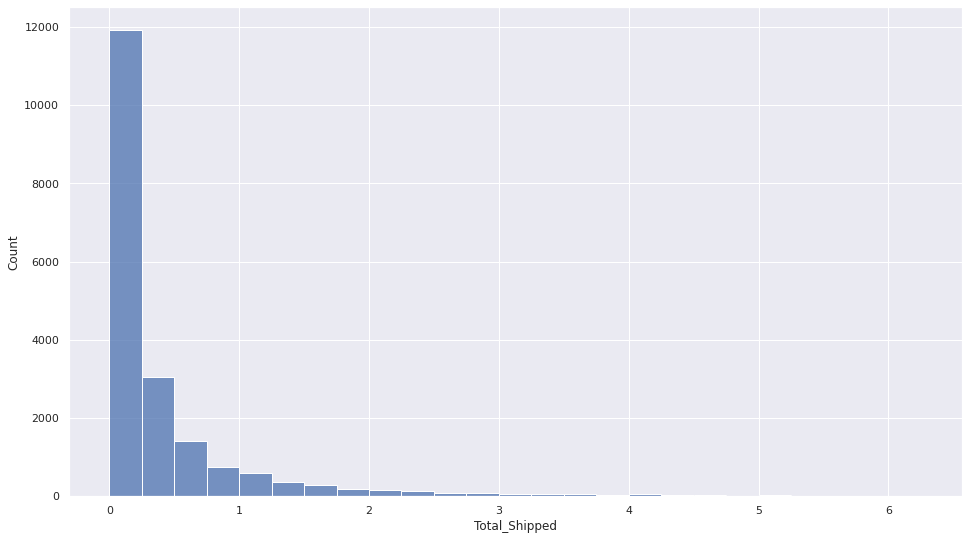

In [ ]:
year_aggr = game_data.groupby(['Year']).count().reset_index()
sns.set(rc = {'figure.figsize':(16,9)})
ax = sns.histplot(x="Total_Shipped", data=game_data, bins=[x/4 for x in range(0, 26)])

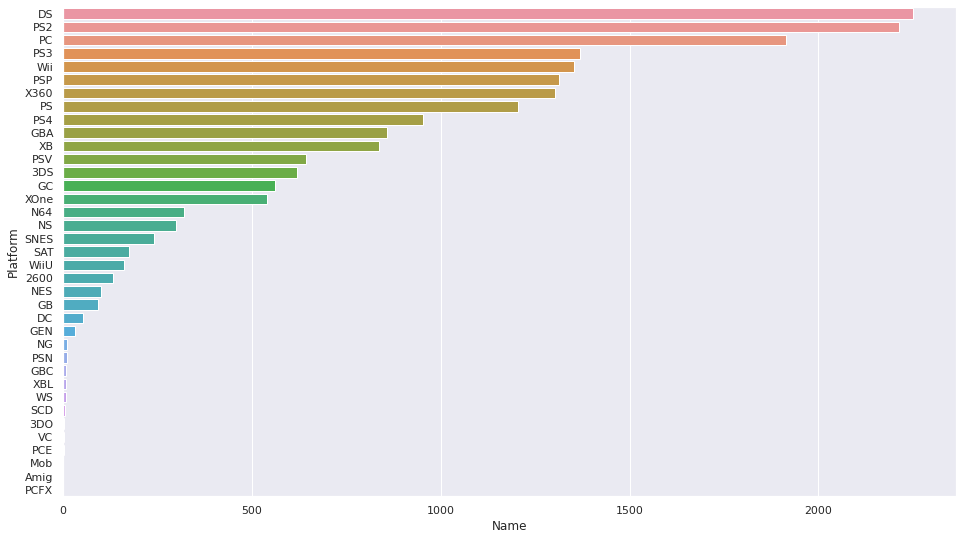

In [ ]:
platform_aggr = game_data.groupby(['Platform']).count().reset_index().sort_values(ascending=False,by='Name') 
sns.set(rc = {'figure.figsize':(16,9)})
ax = sns.barplot(x="Name", y="Platform", data=platform_aggr)


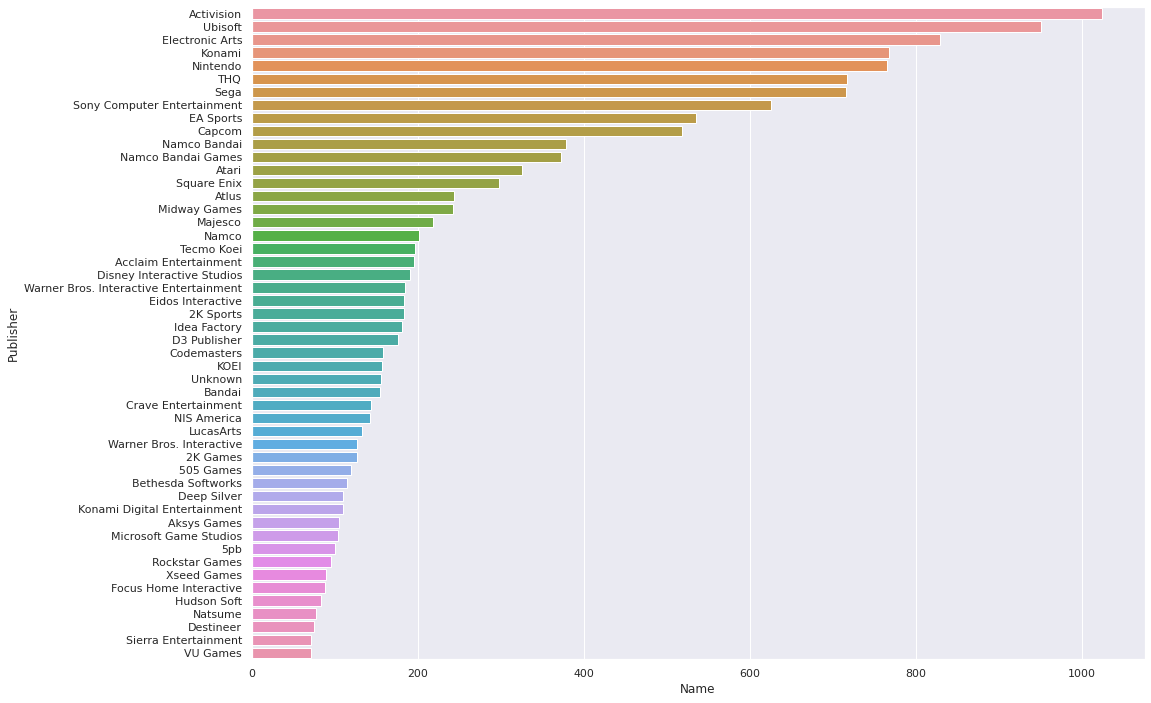

In [ ]:
company_aggr = game_data.groupby(['Publisher']).count().reset_index().sort_values(ascending=False,by='Name') 
sns.set(rc = {'figure.figsize':(16,12)})
ax = sns.barplot(x="Name", y="Publisher", data=company_aggr.head(50))

In [ ]:
ax = sns.catplot(x ="year", y="survived", col="Publisher", data=game_data,saturation=.5, kind="bar", ci=None, aspect=.6))

,Publisher,Rank,Name,Platform,Developer,Critic_Score,User_Score,Total_Shipped,Year
37,Activision,1024,1024,1024,1024,601,66,1024,1024
916,Ubisoft,950,950,950,949,577,129,950,950
257,Electronic Arts,829,829,829,829,633,79,829,829
474,Konami,768,768,768,768,330,16,768,768
615,Nintendo,765,765,765,765,522,194,765,765
841,THQ,717,717,717,717,407,14,717,717
764,Sega,716,716,716,716,378,76,716,716
790,Sony Computer Entertainment,625,625,625,625,385,63,625,625
243,EA Sports,535,535,535,535,448,52,535,535
153,Capcom,518,518,518,518,319,81,518,518


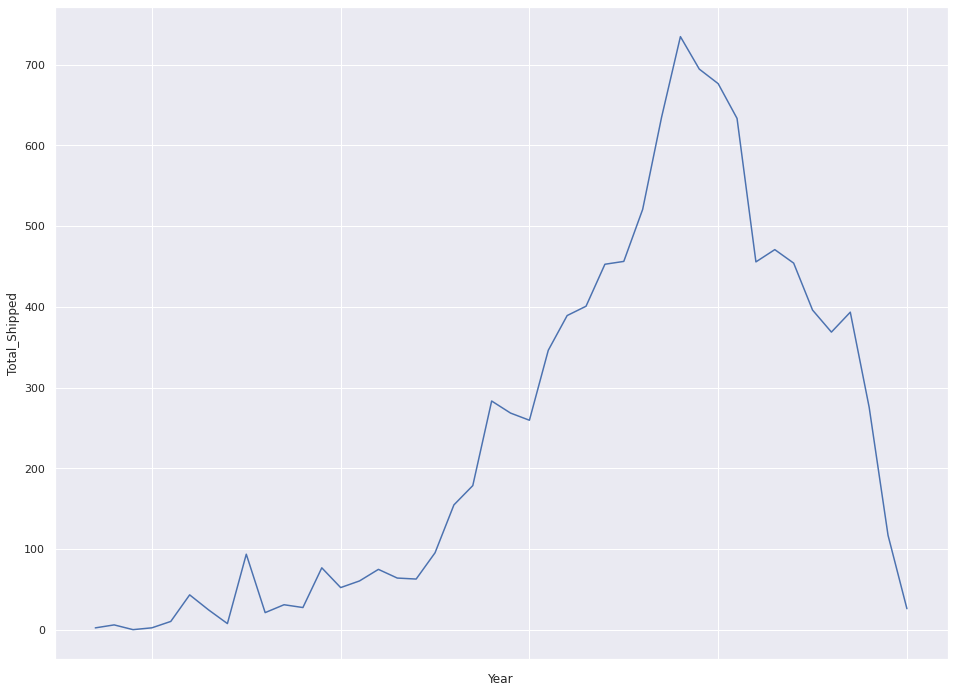

In [ ]:
sales_aggr = game_data.groupby(['Year']).sum().reset_index()
sns.set(rc = {'figure.figsize':(16,12)})
ax = sns.lineplot(x="Year", y="Total_Shipped", data=sales_aggr)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

In [ ]:
from igdb.wrapper import IGDBWrapper
wrapper = IGDBWrapper("", "")


'''With a wrapper instance already created'''

# Protobuf API request
from igdb.igdbapi_pb2 import GameResult
# JSON API request
byte_array = wrapper.api_request('external_games','fields *; offset 500600; limit 500;')
# parse into JSON however you like...
import json

games_dict = json.loads(byte_array)

for i in games_dict:
  print(i)



In [ ]:
byte_array = wrapper.api_request('genres','fields *; limit 500;')

genres_dict = json.loads(byte_array)

for i in sorted(genres_dict, key= lambda k: k["id"]):
  print(i)

print(len(genres_dict))

{'id': 2, 'created_at': 1297555200, 'name': 'Point-and-click', 'slug': 'point-and-click', 'updated_at': 1323302400, 'url': 'https://www.igdb.com/genres/point-and-click', 'checksum': 'ef2ff68a-f7bd-d2d0-76cb-c830bd6e3191'}
{'id': 4, 'created_at': 1297555200, 'name': 'Fighting', 'slug': 'fighting', 'updated_at': 1323216000, 'url': 'https://www.igdb.com/genres/fighting', 'checksum': '2ccc6572-bdde-6ed4-8843-25447ea40782'}
{'id': 5, 'created_at': 1297555200, 'name': 'Shooter', 'slug': 'shooter', 'updated_at': 1323216000, 'url': 'https://www.igdb.com/genres/shooter', 'checksum': 'bb15fd3f-0f46-e5f3-2b40-d046cf9bd2ef'}
{'id': 7, 'created_at': 1297555200, 'name': 'Music', 'slug': 'music', 'updated_at': 1323216000, 'url': 'https://www.igdb.com/genres/music', 'checksum': '22d44a0d-89c7-580f-eef2-e06f178fdd47'}
{'id': 8, 'created_at': 1297555200, 'name': 'Platform', 'slug': 'platform', 'updated_at': 1323216000, 'url': 'https://www.igdb.com/genres/platform', 'checksum': '697fc5a4-b96f-a803-288a-4